In [3]:
import os
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.gridspec as gridspec

from ml_util import plot_learning_curve, setup, plot_digits, generate_image_grid, combined_generate_image_grid
from sklearn import metrics
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from tensorflow import keras

Random_Number = 42
TESTING = True

In [4]:
def split_data(X, y, Normalize=False):
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.20, random_state=Random_Number)

    if Normalize:
        train_X = train_X / 255.0
        train_X = train_X.astype(np.float32)
        test_X = test_X / 255.0
        test_X = test_X.astype(np.float32)
    test_X, valid_X = np.split(test_X.astype(np.float32), 2)
    test_y, valid_y = np.split(test_y.astype(np.uint8), 2)
    return train_X, train_y, valid_X, valid_y, test_X, test_y

In [5]:
gathered_data = setup(["MNIST"])
gathered_data_fashion = setup(["Fashion-MNIST"])

dataset folder already exists.
MNIST dataset found:
	Loading MNIST.feather
	Finished loading MNIST dataset
dataset folder already exists.
Fashion-MNIST dataset found:
	Loading Fashion-MNIST.feather
	Finished loading Fashion-MNIST dataset


In [6]:
train_X, train_y, valid_X, valid_y, test_X, test_y = split_data(gathered_data["MNIST"]["X"], gathered_data["MNIST"]["y"])
fashion_train_X, fashion_train_y, fashion_valid_X, fashion_valid_y, fashion_test_X, fashion_test_y = split_data(gathered_data_fashion["Fashion-MNIST"]["X"], gathered_data_fashion["Fashion-MNIST"]["y"])

In [7]:
mnist_names = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']
fashion_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

NN_Figures folder already exists.


C:\Users\joshu\OneDrive - Georgia Institute of Technology\Georgia-Tech\CS 7641 - Machine Learning\Assignments\Supervised Learning\ml_util.py:211: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  plt.savefig(f"{save_dir}/Image_Grid_Combined_random.png", bbox_inches='tight')
C:\ProgramData\Anaconda3\envs\CS7641\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  fig.canvas.print_figure(bytes_io, **kw)


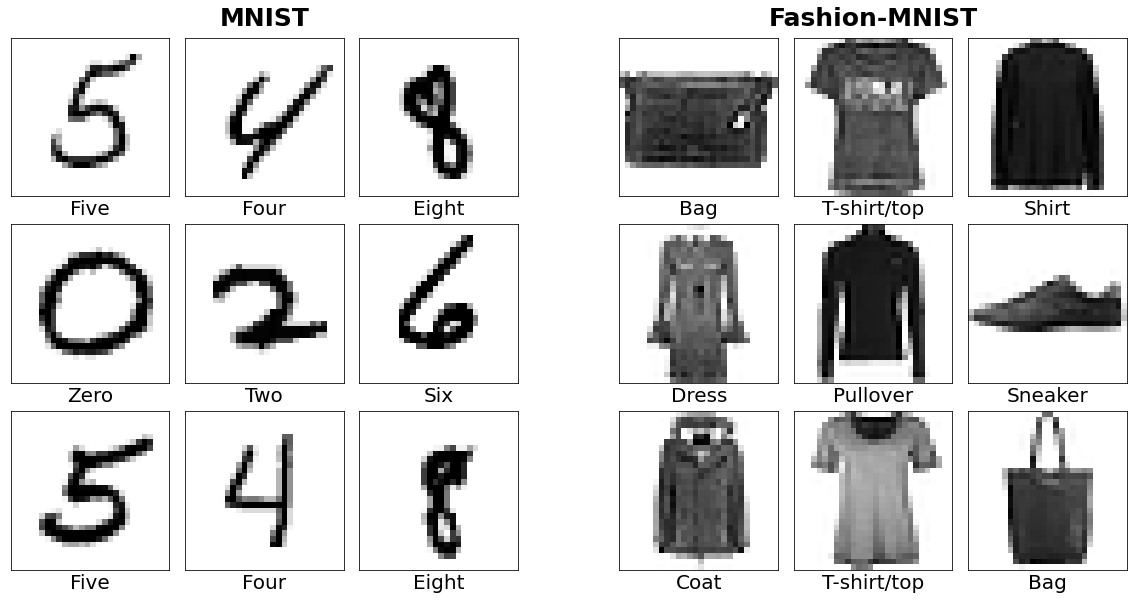

In [8]:
combined_generate_image_grid(class_one_names=mnist_names, class_two_names=fashion_names, 
                             data1_X=train_X.to_numpy(), data1_y=train_y.to_numpy(), 
                             data2_X=fashion_train_X.to_numpy(), data2_y=fashion_train_y.to_numpy(),
                             save_dir="NN_Figures")

In [106]:
test_df = np.zeros(shape=(3, 3))
test_df
a = np.zeros(shape=(1, 3))
c = np.append(test_df, a, axis=0)
c

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [85]:
def get_training_accuracy(a, b):
    pred_y = np.argmax(model.predict(test_X), axis=-1)
    temp = np.isclose(test_y, pred_y).astype(bool)
    acc = temp.sum()/test_y.shape[0]
    print(f"\n\n\tTesting Accuracy: {acc:.2f}")

In [97]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(784,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

train_X.shape
# reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
#                               patience=5, min_lr=0.001)

lam_cb = tf.keras.callbacks.LambdaCallback(on_epoch_end=get_training_accuracy)

# region Training Time
start_time = time.time()
model_results = model.fit(train_X, train_y, epochs=10, verbose=1, callbacks=[lam_cb])
cv = np.asarray(model_results.history["accuracy"])
end_time = time.time()
elapsed_time = end_time - start_time

print(train_X.shape)

Epoch 1/10
1743/1750 [============================>.] - ETA: 0s - loss: 0.2621 - accuracy: 0.9255

	Testing Accuracy: 0.95
1750/1750 [==============================] - 3s 1ms/step - loss: 0.2616 - accuracy: 0.9256
Epoch 2/10
1720/1750 [============================>.] - ETA: 0s - loss: 0.1135 - accuracy: 0.9660

	Testing Accuracy: 0.97
1750/1750 [==============================] - 2s 1ms/step - loss: 0.1127 - accuracy: 0.9663
Epoch 3/10
1742/1750 [============================>.] - ETA: 0s - loss: 0.0768 - accuracy: 0.9762

	Testing Accuracy: 0.97
1750/1750 [==============================] - 2s 1ms/step - loss: 0.0768 - accuracy: 0.9762
Epoch 4/10
1722/1750 [============================>.] - ETA: 0s - loss: 0.0570 - accuracy: 0.9825

	Testing Accuracy: 0.97
1750/1750 [==============================] - 2s 1ms/step - loss: 0.0572 - accuracy: 0.9824
Epoch 5/10
1734/1750 [============================>.] - ETA: 0s - loss: 0.0443 - accuracy: 0.9863

	Testing Accuracy: 0.97
1750/1750 [==========

In [80]:
print(test_X.shape)
y_pred = model.predict(test_X)
print(y_pred.shape)

(7000, 784)
(7000, 10)


In [98]:
df = pd.DataFrame(data=model_results.history)

In [99]:
df.head(10)

,loss,accuracy
0,0.261605,0.925643
1,0.112687,0.966286
2,0.076830,0.976214
3,0.057248,0.982375
4,0.044275,0.986232
5,0.033949,0.989839
6,0.026873,0.991643
7,0.022284,0.992964
8,0.017597,0.994714
9,0.014709,0.995732


Text(0.5, 0, 'Epochs')

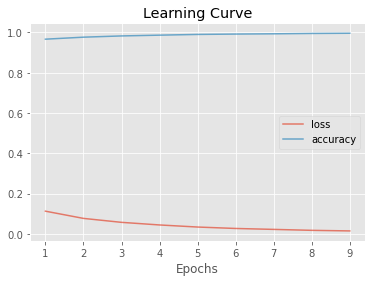

In [100]:
plt.style.use("ggplot")
ax = df.iloc[1:, :].plot(title='Learning Curve', alpha=0.7)
ax.set_xlabel("Epochs")